# A model for multipurpose dopamenergic signaling in associative learning and integration of contradictory inputs

In [827]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

graphics_path = '../Final Paper/graphics/'

Neural Voltage given by:
$$C\dot{v} = k(v-v_r)(v-v_t) - u + I + [e \sim N(0,\sigma)]$$

$u$ is the recovery current
$$\dot{u} = a(b(v-v_r)-u) $$

when $v > v_t$:
$$v \leftarrow c, u \leftarrow u + d$$

Synaptic input is given by
$$I = gS(v_{rev} - v)$$

Synaptic transmitter is given by:
$$\dot{S} = \frac{-S}{\tau_{syn}} + \phi\delta(t - t_{pre})$$

We want to start from antennal lobe glomeruli


In [669]:
n_s = 160#s
t_s = 0.25#ms
time_vec = np.arange(t_s,n_s * 1000,1/(t_s))
num_samples = len(time_vec)

num_glom = 49
noise_glom_co2 = (0.5,0.1)
cO2_signal = 3
cO2_density = 0.02

noise_glom = (0.5,1)
num_stimuli = 3
stim_density = 0.4

In [671]:
cO2_activation = np.random.normal(noise_glom_co2[0],noise_glom_co2[1], (1,num_glom))
cO2_activation = cO2_activation * np.random.choice([0,1],p=[1-cO2_density, cO2_density], size=cO2_activation.shape)
cO2_activation[0,0] += cO2_signal
cO2_activation = cO2_activation / np.sqrt(np.power(cO2_activation,2).sum())

other_activations = np.random.normal(noise_glom[0],noise_glom[1], (num_stimuli,num_glom))
other_activations = other_activations * np.random.choice([0,1],p=[1-stim_density, stim_density], 
                                                         size=other_activations.shape)
other_activations = (other_activations / np.sqrt(np.power(other_activations,2).sum(axis=1)[:,np.newaxis]))
other_activations[:,0] = 0
glom_stimuli = np.abs(np.vstack([np.zeros(cO2_activation.shape), cO2_activation, other_activations]))

(5, 49)


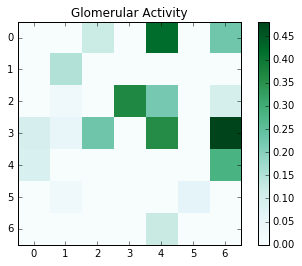

In [840]:
print(glom_stimuli.shape)
plt.imshow(glom_stimuli[2,:].reshape((7,7)), cmap='BuGn',interpolation="nearest")
plt.title('Glomerular Activity')
plt.colorbar()
plt.savefig(graphics_path + 'glom.pdf', bbox_inches='tight')
plt.show()

In [763]:
num_kc = 6 * num_glom
pn_density = 60 / num_kc
num_kc_types = 4
connectivity_matr_kc = np.random.choice([0,1],p=[1-pn_density, pn_density], size=(num_kc,num_glom))

num_mbon = 5
mbon_density = 0.6
kc_types = np.random.choice([0,1],p=[1-mbon_density, mbon_density], size=(num_kc_types,num_mbon))

connectivity_matr_mbon = kc_types[np.random.randint(num_kc_types,size=num_kc),:]
mbon_types = np.array([-1,-1,-1,1,1])

In [944]:
pn_par = {
    'v_r' : -60,
    'v_t' : -40,
    'k' : 0.02,
    'sigma' : 0.02,
    'C' : 7,
    'a' : 0.25,
    'b' : -0.3,
    'c' : -65,
    'd' : 8,
    'v_max' : 85
}

kc_par = {
    'v_r': -85,
    'v_t': -25,
    'k': 0.012,
    'sigma' :0.05,
    'C' : 2,
    'a' : 0.01,
    'b' : -0.3,
    'c' : -65,
    'd' : 8,
    'v_max' : 200,
    'g' : 0.17
}


mbon_par = {
    'v_r' : -60,
    'v_t' : -40,
    'k' : 0.03,
    'sigma' : 0.02,
    'C' : 10,
    'a' : 0.2,
    'b' : -0.3,
    'c' : -65,
    'd' : 8,
    'v_max' : 85,
    'g_max' : 1,
    'g_init' : 0.4,
    'tau-' : 18,
    'tau+' : 18
}

stim_vec =  ([0] * int((1/20)*num_samples) + [2]*int((1/10)*num_samples) + [0]*int((3/10)*num_samples) + [2]*int((1/10)*num_samples))
stim_vec2 = ([0] * int((5/20)*num_samples) + [3]*int((1/10)*num_samples) + [0]*int((1/10)*num_samples) + [3]*int((1/10)*num_samples))

stim_vec = stim_vec   + [0]*int((1/20)*num_samples) + [2]*int((1/10)*num_samples) + [0]*int((4/20)*num_samples) + [2]*int((1/10)*num_samples)
stim_vec2 = stim_vec2 + [0]*int((2/10)*num_samples) + [3]*int((1/10)*num_samples) + [0]*int((1/20)*num_samples) + [3]*int((1/10)*num_samples)

#stim_vec = [0] * int((2/20)*num_samples) +  [2] * int((3/20)*num_samples) + [0] * int((2/20)*num_samples) + [0] * int((3/20)*num_samples)
#stim_vec = stim_vec + stim_vec
#stim_vec2 = [0] * int((2/20)*num_samples) +  [0] * int((3/20)*num_samples) + [0] * int((2/20)*num_samples) + [3] * int((3/20)*num_samples)
#stim_vec2 = stim_vec2 + stim_vec2
positive_reinforcement_signal = [0] * int((2/20)*num_samples) +  [1] * int((3/20)*num_samples) +  [0] * int((15/20)*num_samples)#
negative_reinforcement_signal = [0] * int((7/20)*num_samples) +  [1] * int((3/20)*num_samples) +  [0] * int((10/20)*num_samples)
positive_reinforcement_signal = [0]*int((3/40)*num_samples)  + [1]*int((13/40)*num_samples) + [0]*int((13/40)*num_samples) + [0]*int((3/40)*num_samples) + [0]*int((1/2)*num_samples)
negative_reinforcement_signal = [0]*int((11/40)*num_samples) + [0]*int((3/40)*num_samples) + [0]*int((5/40)*num_samples) + [1]*int((3/40)*num_samples) + [0]*int((1/2)*num_samples)


In [949]:
#(glom_id, param, t)
pf_params = np.stack([np.ones((num_glom,num_samples)) * pn_par['v_r'],np.zeros((num_glom,num_samples))],1)
kc_params = np.stack([np.ones((num_kc,num_samples)) * kc_par['v_r'], # Voltage
                np.zeros((num_kc,num_samples)), # Recovery Current
                np.zeros((num_kc,num_samples)), # Synaptic Transmitter
                np.zeros((num_kc,num_samples)), # STDP
                np.zeros((num_kc,num_samples)), # Amine Signal
                np.zeros((num_kc,num_samples)) # Last Spike Time
                     ],1) 

mbon_params = np.stack([np.ones((num_mbon,num_samples)) * mbon_par['v_r'], # Voltage
                np.zeros((num_mbon,num_samples)), # Recovery Current
                np.zeros((num_mbon,num_samples)) # Synaptic Transmitter
                ],1)

output_params = np.zeros(num_samples)

window = 40 / t_s

last_spike_post = np.zeros((num_mbon,)) - window
last_spike_pre = np.zeros((num_kc,)) - window

kc_mbon = np.array(connectivity_matr_mbon.T, copy=True).astype(float)
kc_mbon_signed = kc_mbon * mbon_types[:,np.newaxis]

positive_mbon = kc_mbon_signed > 0
negative_mbon = kc_mbon_signed < 0

kc_mbon_synapses = np.zeros((4,) + kc_mbon.shape) # Synaptic transmitter, conductance, dopamine, and STDP
kc_mbon_synapses[1,:,:] = kc_mbon * mbon_par['g_init']

kc_mbon_synapses = np.tile(kc_mbon_synapses, (num_samples,1,1,1))

pot_count = 0
dep_count = 0

for i in range(0,num_samples-1):
    #Update Voltage
    p = pn_par
    v_t = np.array(pf_params[:,0,i], copy=True)
    u_t = np.array(pf_params[:,1,i], copy=True)
    stim = glom_stimuli[stim_vec2[i]] + glom_stimuli[stim_vec[i]]
    stim = stim / np.sqrt((stim ** 2).sum() + 0.0000000000001)
    del_v = t_s * (p['k'] * (v_t - p['v_r']) * (v_t - p['v_t']) - u_t + stim + np.random.normal(0,p['sigma'],num_glom)) / p['C']
    del_u = t_s * p['a'] * (p['b'] * (v_t - p['v_r']) - u_t)
    
    v = v_t + del_v
    u = u_t + del_u
    
    at_vmax = (v > p['v_max']).squeeze()
    u = u + at_vmax * 8
    v[at_vmax] = p['c']
    
    pf_params[:,0,i+1] = v
    pf_params[:,1,i+1] = u
    
    #############
    # KC #
    #############
    
    spiked = connectivity_matr_kc.dot((v > -20).squeeze()[:,np.newaxis]).T
    p = kc_par
    v_t = kc_params[:,0,i]
    u_t = kc_params[:,1,i]
    s_t = kc_params[:,2,i]
    
    del_v = (p['k'] * (v_t - p['v_r']) * (v_t - p['v_t']) - u_t + 
             p['g'] * s_t * (- v_t) + np.random.normal(0,p['sigma'],num_kc)) / p['C']
    del_u = p['a'] * (p['b'] * (v_t - p['v_r']) - u_t)
    del_s = -s_t/2 + 0.5 * spiked
    
  
    
    v = kc_params[:,0,i] + del_v
    u = kc_params[:,1,i] + del_u
    
    at_vmax = (v > p['v_max']).squeeze()
    u = u + at_vmax * 8
    v[at_vmax] = p['c']
    
    kc_params[:,0,i+1] = v
    kc_params[:,1,i+1] = u
    kc_params[:,2,i+1] = kc_params[:,2,i] + del_s
    #kc_params[:,6,i+1] = ((v > 50) * i) + (kc_params[:,6,i] * (v < 50))
    
    #############
    # MBON #
    #############
    p = mbon_par
    
    spikes_pre = (kc_params[:,0,i-1] > 50) & (kc_params[:,0,i-2] < 50)
    
    STDP = np.zeros(connectivity_matr_mbon.T.shape)
    
    if spikes_pre.any():
        if False:
            # If they are following a postsynaptic spike, depress the relevant synapses
            dep_count += 1

            relevant_synapses = connectivity_matr_mbon.T * spikes_pre
            # How soon after is this spiking?
            lag = (relevant_synapses * i - last_spike_post[:,np.newaxis]) * relevant_synapses
            lag = lag * (lag < window) * (-t_s / p['tau-'])


            STDP = - 0.2 * np.exp(lag) * (lag != 0)
            # Track them in case they cause a postsynaptic spike
        last_spike_pre = np.maximum(spikes_pre * i,last_spike_pre)
    
    
    
    v_t = mbon_params[:,0,i]
    u_t = mbon_params[:,1,i]
    s_t = kc_mbon_synapses[i,0,:,:]  
    g_t = kc_mbon_synapses[i,1,:,:]
    d_t = kc_mbon_synapses[i,2,:,:]
    c_t = kc_mbon_synapses[i,3,:,:]
    
    del_v = (p['k'] * (v_t - p['v_r']) * (v_t - p['v_t']) - u_t + 
             (g_t * s_t).sum(axis=1) * (- v_t) + np.random.normal(0,p['sigma'],num_mbon)) / p['C']
    del_u = p['a'] * (p['b'] * (v_t - p['v_r']) - u_t)
    del_s = -s_t + 0.5 * spikes_pre
    
    if(False):
        print("This=================")
        print("K Term: ", (p['k'] * (v_t - p['v_r']) * (v_t - p['v_t'])))
        print("Leak Term: ", u_t )
        print("Input Term: ", (g_t * s_t).sum(axis=1) * (- v_t))
        print("Voltage Total: ", del_v)
        print("Synaptic Change: ", del_s)
        print("Here ==============")
        if i > 5:
            break
    
    v = v_t + del_v
    u = u_t + del_u
    
    if i % 5000 == 0:
        #print(del_v, del_s.max())
        pass
    
    # STDP
    spikes_post = (mbon_params[:,0,i] > 50) & (mbon_params[:,0,i-1] < 50)
    if spikes_post.any():
        # If they are following a presynaptic spike, enhance the relevant synapses
        relevant_synapses = connectivity_matr_mbon.T * spikes_post[:,np.newaxis]
        
        pot_count += 1
        # How soon after is this spiking?
        lag = (last_spike_pre - relevant_synapses * i) * relevant_synapses
        lag = lag * (lag < window) * (t_s / p['tau+'])
        STDP = STDP + np.exp(lag) * (lag != 0) * 0.5
        # Track them in case a presynaptic spike follows
        last_spike_post = np.maximum(spikes_post * i,last_spike_post)
        
    del_c = -c_t / 2 + STDP
    del_d = -d_t + 0.3 * positive_reinforcement_signal[i] * negative_mbon + 0.3* negative_reinforcement_signal[i] * positive_mbon
    del_g = c_t * (-1 * d_t)
    
   
    at_vmax = (v > p['v_max']).squeeze()
    u = u + at_vmax * 8
    v[at_vmax] = p['c']

    
    mbon_params[:,0,i+1] = v # Update Voltage
    mbon_params[:,1,i+1] = u # Update Leak
    kc_mbon_synapses[i+1,0,:,:] = s_t + del_s # Update Synaptic Activity
    kc_mbon_synapses[i+1,1,:,:] = np.maximum(g_t + del_g, np.zeros(g_t.shape)) # Update Conductance
    kc_mbon_synapses[i+1,2,:,:] = d_t + del_d # Update Dopamine
    kc_mbon_synapses[i+1,3,:,:] = c_t + del_c # Update STDP
    
    output_params[i] = (mbon_types[[0,1,3,4]] * (mbon_params[[0,1,3,4],0,i] > 0)).sum()
    

Potentiated 94 Times, Depressed 0 Times
(40000, 4, 5, 294) 83.7310131277


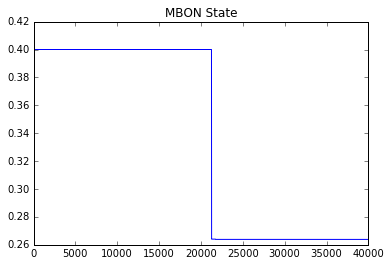

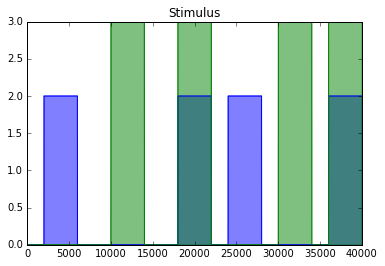

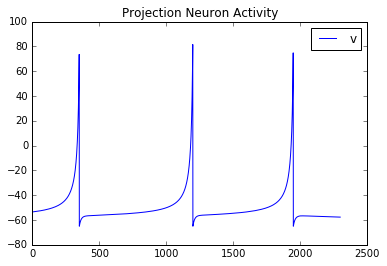

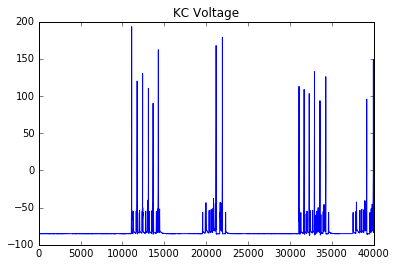

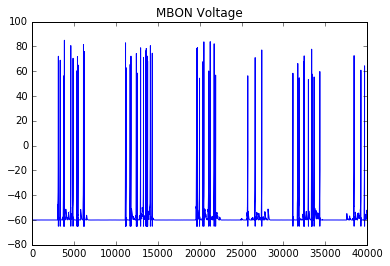

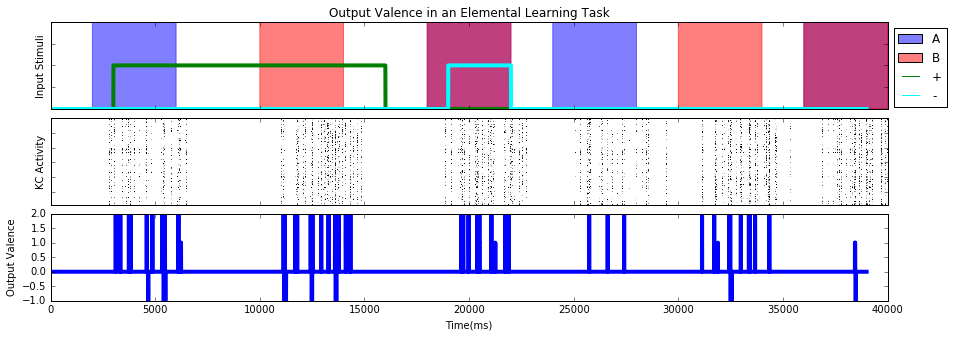

In [946]:
print("Potentiated {} Times, Depressed {} Times".format(pot_count, dep_count))
print(kc_mbon_synapses.shape,mbon_params[1,0,:].max())
mbon_focus = 3
plt.plot(kc_mbon_synapses[:,1,mbon_focus,1])
plt.title('MBON State')
plt.show()

plt.plot(stim_vec)
plt.fill_between(range(len(stim_vec)), 0, stim_vec, color='blue', alpha='0.5')
plt.plot(stim_vec2)
plt.fill_between(range(len(stim_vec2)), 0, stim_vec2, color='green', alpha='0.5')
plt.plot(positive_reinforcement_signal[0:mbon_params.shape[1]])
plt.plot(negative_reinforcement_signal[0:mbon_params.shape[1]])
plt.title('Stimulus')
plt.show()

plt.plot(pf_params[6,0,20000:22300])
plt.title('Projection Neuron Activity')
plt.legend('voltage')
plt.savefig(graphics_path + 'pn2.pdf', bbox_inches='tight')
plt.show()

plt.plot(kc_params[1,0,:])
plt.title('KC Voltage')
plt.show()

plt.plot(mbon_params[mbon_focus,0,:])
plt.title('MBON Voltage')
plt.show()

f = plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.1)
ax1 = plt.subplot(311)
ax1.set_title('Output Valence in an Elemental Learning Task')
ax1.set_ylabel('Input Stimuli')
a= ax1.fill_between(range(len(stim_vec)), 0, (np.array(stim_vec) - 1) * 2 * (np.array(stim_vec) != 0), color='blue', alpha='0.5')
b= ax1.fill_between(range(len(stim_vec2)), 0, (np.array(stim_vec2) - 1) * (np.array(stim_vec2) != 0), color='red', alpha='0.5')
c= ax1.plot(np.array(positive_reinforcement_signal)[0:(mbon_params.shape[2]-1000)],color='green',linewidth=4.0)
d= ax1.plot(np.array(negative_reinforcement_signal)[0:(mbon_params.shape[2]-1000)],color='cyan',linewidth=4.0)

a = plt.Rectangle((0, 0), 1, 1, fc="#7F7FFF")
b = plt.Rectangle((0, 0), 1, 1, fc="#FF7F7F")
e = plt.Rectangle((0, 0), 1, 1, fc="#BF3F7F")
c = plt.Line2D([],[], color="green")
d = plt.Line2D([],[], color="cyan")

ax1.legend([a,b,c,d], ["A", "B", "+", "-"], loc=2, bbox_to_anchor=(1,1))

ax2 = plt.subplot(313)
ax2.plot(output_params[0:mbon_params.shape[2]-1000],linewidth=4.0)
ax2.set_ylabel('Output Valence')
ax2.set_xlabel('Time(ms)')

ax3 = plt.subplot(312)
plt.imshow((kc_params[:,0,:] > -60),aspect='auto',cmap='binary')
ax3.set_ylabel('KC Activity')

xticklabels = [ax1.get_xticklabels(), ax3.get_xticklabels()]
yticklabels = [ax3.get_yticklabels(), ax1.get_yticklabels()]
plt.setp(xticklabels, visible=False)
plt.setp(yticklabels, visible=False)
plt.savefig(graphics_path + 'out3.pdf', bbox_inches='tight')
plt.show()

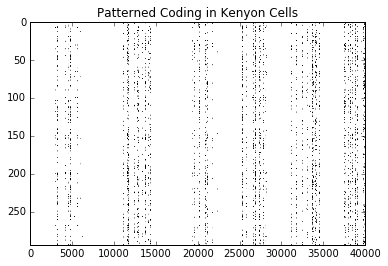

In [916]:
plt.figure()
plt.imshow((kc_params[:,0,:] > -60),aspect='auto',cmap='binary')
plt.title('Patterned Coding in Kenyon Cells')
plt.savefig(graphics_path + 'kc.pdf', bbox_inches='tight')
plt.show()